<a href="https://colab.research.google.com/github/Crimpychimp777/actions-learning-pathway/blob/SUU-Data-Analytics-1-6100/Norm_Elias_Simple%20Linear%20Regression%20and%20testing_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grading rubric:**

- Importing necessay libraries & loading dataset.             ----------- 10 points
- Data subsetting, Scatter plot, lmplot and Heatmap   ------------10 points
- Model building, Model fit and Model summary         ------------10 Points
- Model performance check                      ------------10 points
- Clean coding, proper commenting
- output observation and model conclusion             ------------10 points
- Total Possible points                               ------------50 points

In [1]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/SUU Data Analytics/Module 3/auto-mpg (1).csv")
df.head()

Mounted at /content/drive


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Data subsetting, Scatter plot, lmplot and Heatmap ------------10 points

Data Subsetting - the linear regression model with one dependent ( Target) and one independent (predictor) variable. MPG is X and Weight is Y

In [3]:
df1= df.drop(['cylinders','displacement','horsepower','acceleration','model year',
              'origin','car name'],axis=1)
df1.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


In [31]:
# Let's check if there are any missing values
df1.isnull().sum()

,0
mpg,0
weight,0


Visualize the relationship with Scatterplot between mpg and cylinders

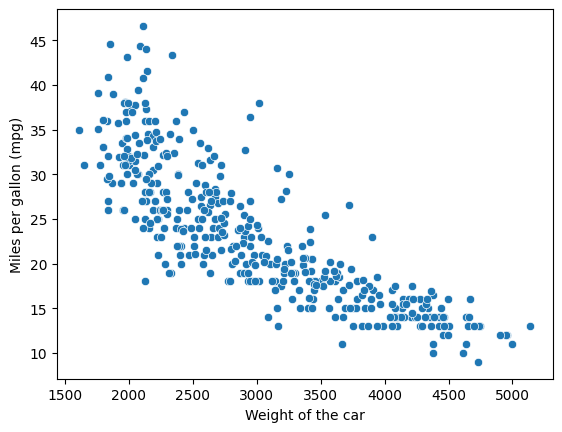

In [4]:
sns.scatterplot(data=df,x='weight',y='mpg')
plt.xlabel('Weight of the car')
plt.ylabel('Miles per gallon (mpg)')
plt.show()

linear model using lmplot

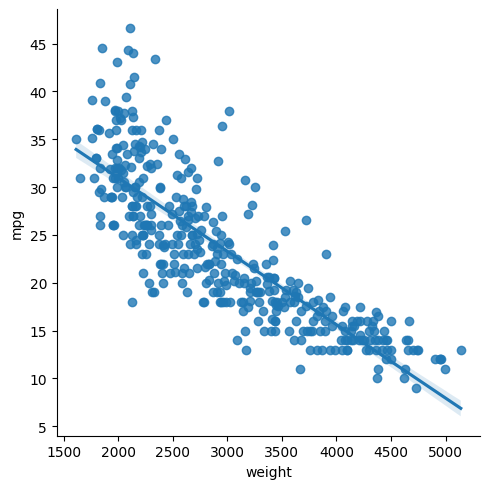

In [5]:
sns.lmplot(data=df, x='weight', y='mpg');

Heatmap to measure their correlation strength.

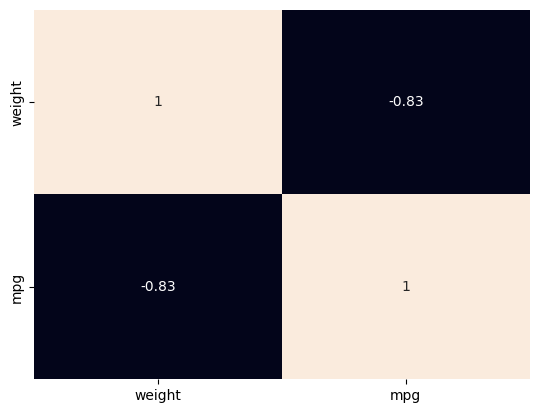

In [6]:
sns.heatmap(data=df[['weight','mpg']].corr(), annot=True, cbar=False);

Model building, Model fit and Model summary ------------10 Points

Model Building, 1.st assign one varible as dependent and other as independent, weight in x axis and mpg in Y axis.
2.d use OLS regression model to assume the regression line passes through an origin by adding a constant column.
3rd. we will split data into training and testing sets

In [11]:
#putting 'weight' in X-axis and 'mpg' in y-axis.
X= df1['weight']
y= df1['mpg']

# Adding the intercept to data
X = sm.add_constant(X)
X.head()

# Adding the intercept to data
X = sm.add_constant(X)
X.head()

#Split the data into train and test sets
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
print('X_train:')
print(X_train.head())
print('X_test:')
print(X_test.head())
print('y_train:')
print(y_train.head())
print('y_test:')
print(y_test.head())

X_train:
     const  weight
350    1.0    2215
59     1.0    2254
120    1.0    2868
12     1.0    3761
349    1.0    1985
X_test:
     const  weight
174    1.0    2984
359    1.0    3230
250    1.0    3735
274    1.0    2830
283    1.0    3265
y_train:
350    34.7
59     23.0
120    19.0
12     15.0
349    34.1
Name: mpg, dtype: float64
y_test:
174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
Name: mpg, dtype: float64


Model fit: Fit the linear model using the OLS model

the OLS() function of the statsmodels.api is the function that performs OLS (ordinary least squares) regression.
the fit() method is calle don this OLS object for fitting the regression line with minimal deviations.
the summary of these two methods gives us descriptive statistics of the regression results.

In [14]:
# Define OLS model that takes target variable as a first parameter and predictor variable as a second parameter.
olsmod = sm.OLS(y_train, X_train)

# Fit the model with x and y data values.
olsres = olsmod.fit()

#training
X_train.shape
y_train.shape

(278,)

In [32]:
# Print the model parameters ( constant and slope)
print(olsres.params)
print("****************************")
print("****************************")
# Finally print the Descriptive Statistics summary
print(olsres.summary())

const     46.187461
weight    -0.007657
dtype: float64
****************************
****************************
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     572.4
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           2.93e-69
Time:                        18:01:00   Log-Likelihood:                -812.00
No. Observations:                 278   AIC:                             1628.
Df Residuals:                     276   BIC:                             1635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

Model performance check ------------10 points

1. We must check for the models performance using the metrics from summary output directly above
2. we will use SKlearn, RMSE, MAE, and R^2
3. function to calculate the MAPE statistic and and the Adjusted R^2
4. Print out data to visualize metrics.

##Interpreting the Regression Results:


Please interprete the following parameters from your model summary.
1. **Adjusted. R-squared**: In this example the value for adj. R-Squared is .673, which is a good desription of dependent variable


2. ***const* coefficient**: our figure for the Y-intercept isthe coefficient are 46.18 meaning it doesnt depend on X and is a fixed value.


3. **Coefficient of a predictor variable**: The coefficient in our case is
-.0077. it changes the output Y when predictor value changes.

output observation and model conclusion ------------10 points

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [38]:
# 1. check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
# 2. function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# 3. function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# 3. function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance
    model: regressor, predictors: independent variables, target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # RMSE
    mae = mean_absolute_error(target, pred)  # MAE
    mape = mape_score(target, pred)  # MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [40]:
# 4. checking performance on trained set (70%)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsres, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.490324,3.398547,0.674671,0.672305,14.941649


In [41]:
# 4. checking performance on tested set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsres, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.949314,3.028669,0.733233,0.728672,13.0264


**Observations**

- The training R² of 0.67 indicates a reasonable fit to the training data, meaning the model is not underfitting.

- The RMSE and MAE values are similar for both the training and testing datasets, indicating no significant overfitting.

- The test MAE of approximately 3 suggests that, on average, the model's predictions for mpg are off by about 3 miles per gallon.

- The test MAPE of 13% means that the model's predictions are, on average, within 13% of the actual mpg values.
